<a href="https://colab.research.google.com/github/skandanyal/Deep_Learning/blob/main/1_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Exploring an end-to-end workflow.

In [1]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together (training pipeline)",
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together (training pipeline)'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.8.0+cu126


## Data (preparing and loading)

**Data can be almost anything**

* Excel spreadsheets
* Images of any kind
* Videos
* Audio
* DNA
* Text       

**Machine learning is a game of two parts:**
1.    Get data into numerical representation.
2.    Build a model to learn patterns in that numerical representation.

**Building a linear regression model for demonstration:**    
Use a linear regression formula to make a straight line with known **parameters.**

In [3]:
# Create *knwon* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Looking at a few numbers
print(X[:10])
print( y[:10])
print(len(X), len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


**Splitting data into training and test datasets**

In [4]:
# Create train-test-split

train_split = int(0.75 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Training data: {len(X_train)} samples")
print(f"Test data: {len(X_test)} samples")

Training data: 37 samples
Test data: 13 samples


**How can we better visualize our data:**

Visualize! Visualize! Visualize!

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        # we shall compare predictions against y_test
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # legend
    plt.legend(prop={"size": 14})

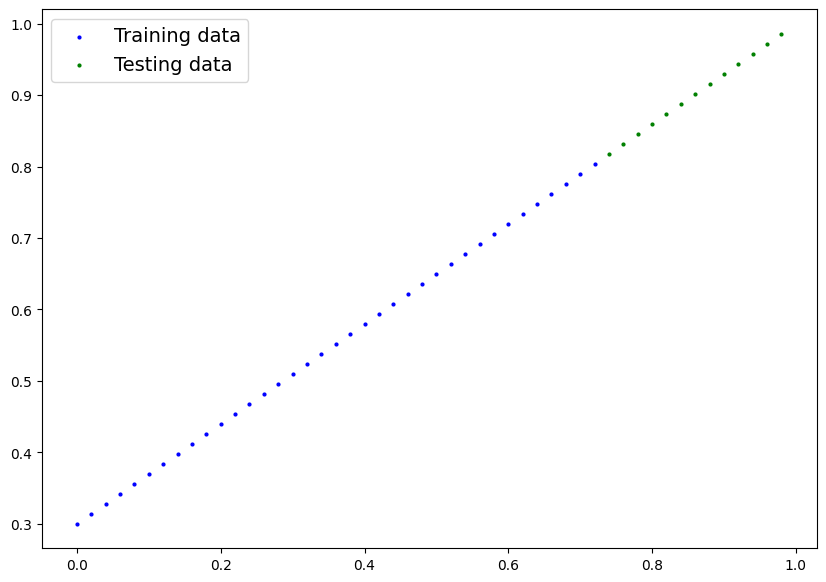

In [6]:
plot_predictions()

## Build model

**What our model does:**
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

**How does it do so?**
1.    Gradient descent
2.    Backpropagation

In [7]:
# Create a linear regression python class

import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # initialize model
        self.weights = nn.Parameter(torch.randn(1,  # start with a random number and work through it
                                                requires_grad=True,
                                                dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,     # start with a random number and work through it
                                             requires_grad=True,
                                             dtype=torch.float))

    # forward() method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials

* `torch.nn` - contains all the blocks for NNs (computational graphs).
* `torch.nn.Parameter` - what params should out model try and learn from torch.nn,
* `torch.nn.Module` - base class for all nn modules. If you subclass it, you should override `forward()`.
* `torch.optim` - here is where the optimizers in pyTorch live, will help us with gradient descent.
* def `forward()` - all nn.Module() subclasses require you to overwrite forward()

### Checking the contents of our PyTorch model:

We can checking the model params using `.parameters()`.

In [8]:
torch.manual_seed(5)                                            # create a random seed

model_0 = LinearRegressionModel()                               # creating an instance of our model
print(list(model_0.parameters()))                               # checking the parameters
print(list(model_0.state_dict()))                               # list all named params

[Parameter containing:
tensor([-0.4868], requires_grad=True), Parameter containing:
tensor([-0.6038], requires_grad=True)]
['weights', 'bias']


### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let us see how well it predicts `y_test` based upon `x_test`.

When we pass the data through our model, it's going to run it through the `forward()`method.

In [9]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)

tensor([[-0.9640],
        [-0.9738],
        [-0.9835],
        [-0.9932],
        [-1.0030],
        [-1.0127],
        [-1.0225],
        [-1.0322],
        [-1.0419],
        [-1.0517],
        [-1.0614],
        [-1.0711],
        [-1.0809]])


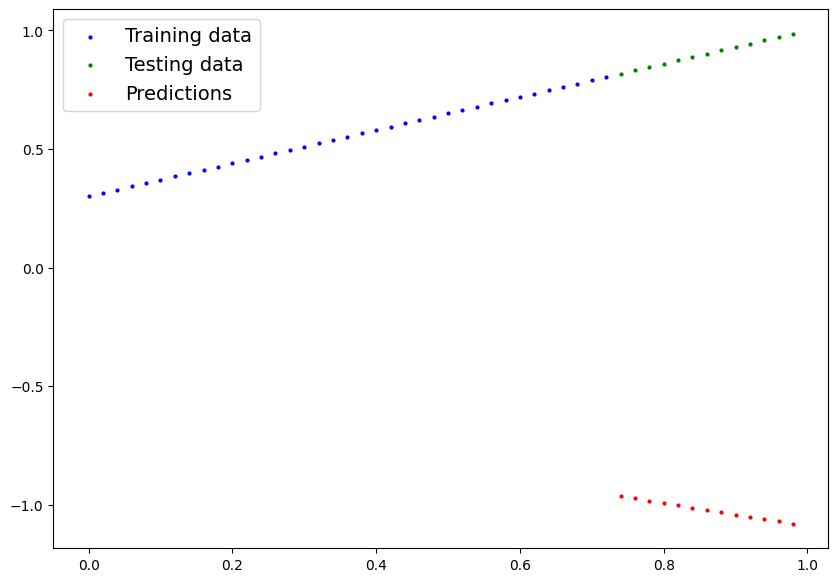

In [10]:
plot_predictions(predictions=y_preds)                                   # damn.....

`torch.inference_mode()` and `torch.no_grad()` do a few things pretty similarly, and disctinctively. To know more, visit - https://x.com/PyTorch/status/1437838231505096708?lang=en

### Training a model

Taking the model from having a poor representation of data to a better representation of data.    

One way to know how poor a model is performing, is by analyzing its loss function (also called as cost function or criterion.)     

**Things we need to train a model:**
1.    **Loss function:** A function which basically says how wrong the model is.
2.    **Optimizer():** Takes into account the loss of a model and adjusts the model's parameters (weights and biases).    

Specifically for PyTorch, we need:
*    Training loop
*    Testing loop

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.4868])), ('bias', tensor([-0.6038]))])

In [12]:
# set-up a loss function and an optimizer (hyper-parameter tuning)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters in the model
                            lr=0.01                      # learning rate for our model
                            )

**Which loss function and optimizer to use?**    
A: Problem specific -    
*    For regression problems: use loss function `nn.L1Loss()` and optimiser `torch.optim.SGD()`.    
*    For classification problems: use loss function `nn.BCELoss()`

In [13]:
# AIM - reduce the MAE as much as possible

### Building a training loop, testing loop in PyTorch

Things in training loop:

0.   Looping through the data
1.   Forward pass/propagation- involves data moving through our model's `forward()` functions
2.   Calculate the loss (compare forward pass predictions to ground truth labels)
3.   Optimizer zero grad
4.   Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5.   Optimizer step **(gradient descent)**- use the optimizer to adjust our model's params to adjust the loss.



In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.4868], requires_grad=True),
 Parameter containing:
 tensor([-0.6038], requires_grad=True)]

In [15]:
with torch.inference_mode():            # or torch.no_grad()
    list(model_0.eval().parameters())

In [16]:
print(f"Before running the training loop: {model_0.state_dict()}")

Before running the training loop: OrderedDict({'weights': tensor([-0.4868]), 'bias': tensor([-0.6038])})


In [17]:
torch.manual_seed(5)

# An apoch is one loop through the data
epochs = 2001

# tracking experiments - track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through the data
for epoch in range(epochs):

    # Set the model to training mode
    model_0.train()                         # now all the parameters which require gradients will be required to account the gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)         # input first, target next
    if epoch % 100 == 0:
        print(f"Loss at epoch {epoch}: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform back propagation
    loss.backward()

    # 5. Set the optimizer (perform gradient descent)
    optimizer.step()                        # reset the accumulated optimizer changes back to 0

    model_0.eval()                          # turns off gradient tracking
    with torch.inference_mode():
        # 1. do the forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 1000 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Loss: {loss} | Test loss: {test_loss}\n")



Loss at epoch 0: 1.3310626745224
Loss: 1.3310626745224 | Test loss: 1.911357045173645

Loss at epoch 100: 0.22930103540420532
Loss at epoch 200: 0.11151206493377686
Loss at epoch 300: 0.08147313445806503
Loss at epoch 400: 0.051437344402074814
Loss at epoch 500: 0.021401768550276756
Loss at epoch 600: 0.006217827554792166
Loss at epoch 700: 0.006217827554792166
Loss at epoch 800: 0.006217827554792166
Loss at epoch 900: 0.006217827554792166
Loss at epoch 1000: 0.006217827554792166
Loss: 0.006217827554792166 | Test loss: 0.0027968240901827812

Loss at epoch 1100: 0.006217827554792166
Loss at epoch 1200: 0.006217827554792166
Loss at epoch 1300: 0.006217827554792166
Loss at epoch 1400: 0.006217827554792166
Loss at epoch 1500: 0.006217827554792166
Loss at epoch 1600: 0.006217827554792166
Loss at epoch 1700: 0.006217827554792166
Loss at epoch 1800: 0.006217827554792166
Loss at epoch 1900: 0.006217827554792166
Loss at epoch 2000: 0.006217827554792166
Loss: 0.006217827554792166 | Test loss: 0.

**Notice the difference here...**

In [18]:
print(f"After running the training loop: {model_0.state_dict()}")

After running the training loop: OrderedDict({'weights': tensor([0.6954]), 'bias': tensor([0.3067])})


In [19]:
print(f"Target to be reached: {weight} and {bias}")

Target to be reached: 0.7 and 0.3


In [20]:
with torch.inference_mode():
    y_preds = model_0(X_test)

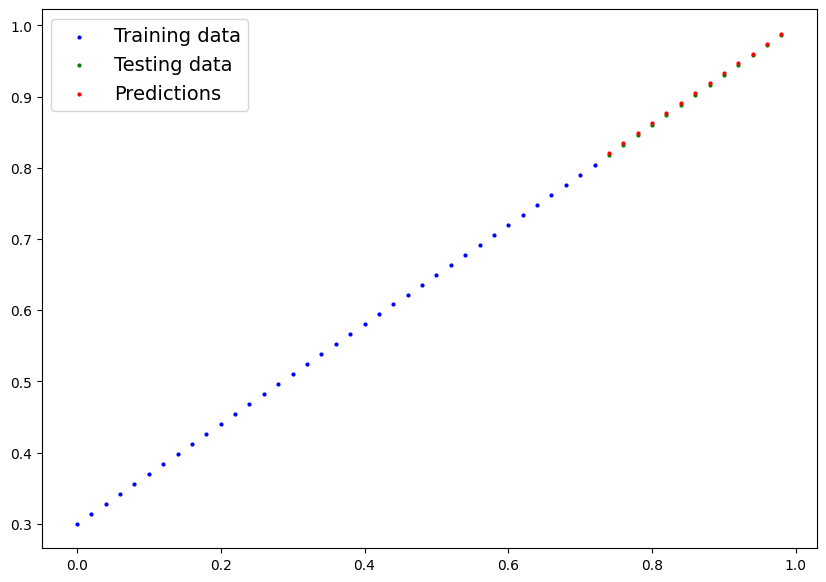

In [21]:
plot_predictions(predictions=y_preds)

<class 'int'> <class 'torch.Tensor'> <class 'torch.Tensor'>


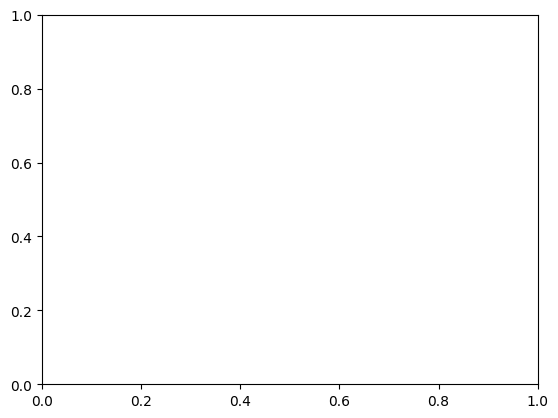

In [28]:
# plotting the loss curves
try:
    plt.plot(epoch_count, loss_values, label="Train loss")
    plt.plot(epoch_count, test_loss_values, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();

except Exception as e:
    pass

import numpy as np
# the code is still not working because of the datatype of elements inside the lists
# we first have to convert it into numpy array
print(type(epoch_count[0]), type(loss_values[0]), type(test_loss_values[0]))

/tmp/ipython-input-4113263780.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(np.array(torch.tensor(epoch_count).numpy()), np.array(torch.tensor(loss_values).numpy()), label="Train loss")


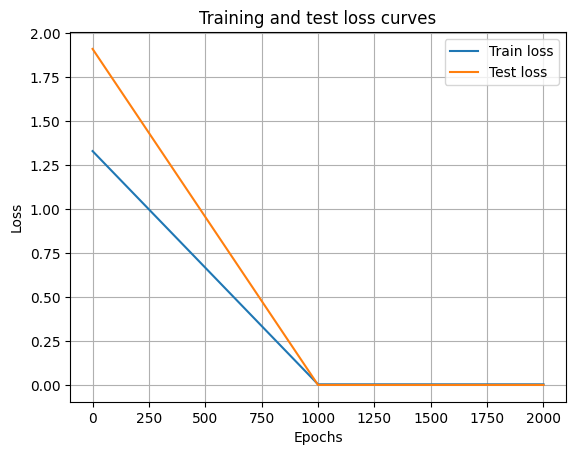

In [31]:
import numpy as np

plt.plot(np.array(torch.tensor(epoch_count).numpy()), np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(np.array(torch.tensor(epoch_count).numpy()), np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend();

In [30]:
# dictionary which holds the params in the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3067]))])

## Saving a model in PyTorch

There are three main methods which help in saving and loading PyTorch models.

1. `torch.save()` - allows you to save a model in Pickle format     
2. `torch.load()` - allows you to load the model which was saved in pickle format
3. `torch.nn.Module.load_state_dict()` - allows to load a model's state dict

In [33]:
from pathlib import Path

# 1. create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
    parents=True,
    exist_ok=True
)

# 2. Create model save path
MODEL_NAME = "01_workflow_model.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Saving the state dict
print(f"Saving the path in the path: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_0.state_dict(),
    f=MODEL_SAVE_PATH
)

Saving the path in the path: models/01_workflow_model.pt


In [34]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1973 Sep 27 09:57 01_workflow_model.pt


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new isntance of our model and load the `state_dict()` into that.

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3067]))])

In [37]:
# To load in a saved state_dict, we have to instantiate a new onstance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the samed state_dict of mdoel_0 - update the new instance with uploaded params
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [38]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3067]))])

In [39]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8213],
        [0.8353],
        [0.8492],
        [0.8631],
        [0.8770],
        [0.8909],
        [0.9048],
        [0.9187],
        [0.9326],
        [0.9465],
        [0.9604],
        [0.9743],
        [0.9882]])

In [44]:
# Make prediction using the model_0
with torch.inference_mode():
    og_model_preds = model_0(X_test)

print(og_model_preds, "\n")
print(og_model_preds == loaded_model_preds)

tensor([[0.8213],
        [0.8353],
        [0.8492],
        [0.8631],
        [0.8770],
        [0.8909],
        [0.9048],
        [0.9187],
        [0.9326],
        [0.9465],
        [0.9604],
        [0.9743],
        [0.9882]]) 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


#